In [56]:
import glob
import os
import re
import sys
import warnings

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from tqdm import tqdm
import lightgbm as lgb
from scipy import stats

warnings.filterwarnings('ignore')

In [16]:
train = pd.read_csv('../processed_data/train_v12.csv')
test = pd.read_csv('../processed_data/test_v12.csv')

In [17]:
train.columns[14:]

Index(['enviroment', 'structure', 'contract_period', 'log_y', 'area_num',
       'age_month', 'max_floor', 'room_num', 'L', 'D',
       ...
       'area_num_countall', 'age_countall', 'floor_countall',
       'max_floor_countall', 'layout_countall', 'direction_countall',
       'facilities_countall', 'contract_period_countall', 'latitude',
       'longitude'],
      dtype='object', length=111)

In [18]:
test.columns[14:]

Index(['structure', 'contract_period', 'area_num', 'age_month', 'max_floor',
       'room_num', 'L', 'D', 'K', 'R',
       ...
       'age_countall', 'floor_countall', 'max_floor_countall',
       'layout_countall', 'direction_countall', 'facilities_countall',
       'contract_period_countall', 'latitude', 'longitude', 'label'],
      dtype='object', length=109)

In [19]:
mdl = lgb.Booster(model_file='../mdl/1013_lgbm.txt')

In [20]:
feature_importances = pd.DataFrame()
feature_importances['feature'] = mdl.feature_name()
feature_importances['importance'] = mdl.feature_importance()
feature_importances = feature_importances.sort_values(by='importance', ascending=False)
print(len(feature_importances))
feature_importances[24:]

89


,feature,importance
17,sm_doku,24
74,kitchen_12,22
19,onsui,15
18,kanso,14
77,kitchen_15,13
...,...,...
37,facilities_10,1
50,facilities_28,1
7,R,1
5,D,1


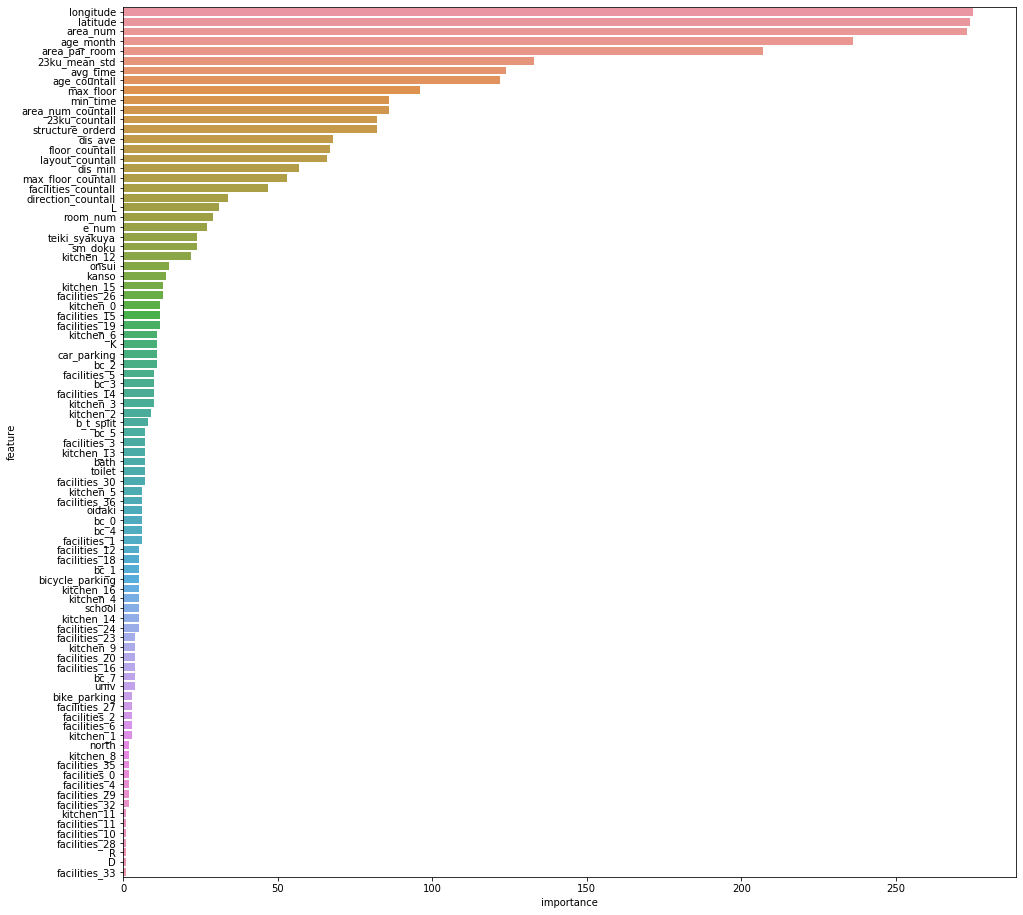

In [21]:
plt.figure(figsize=(16, 16))
sns.barplot(data=feature_importances, x='importance', y='feature')

In [25]:
mdl = lgb.Booster(model_file='../mdl/1013_lgbm_2.txt')
mdl.feature_name()

['area_num',
 'age_month',
 'max_floor',
 'S',
 'structure_orderd',
 'min_time',
 'avg_time',
 'dis_ave',
 'dis_min',
 'area_par_room',
 '23ku_mean_std',
 'facilities_7',
 'facilities_8',
 'facilities_9',
 'facilities_13',
 'facilities_17',
 'facilities_21',
 'facilities_22',
 'facilities_25',
 'facilities_31',
 'facilities_34',
 'bc_6',
 'kitchen_7',
 'kitchen_10',
 '23ku_countall',
 'area_num_countall',
 'age_countall',
 'floor_countall',
 'max_floor_countall',
 'layout_countall',
 'contract_period_countall',
 'latitude',
 'longitude']

In [31]:
len(mdl.feature_name())

33

In [37]:
test['label'].sum()

625

(array([81., 57., 36., 27., 13., 13.,  6.,  5.,  2.,  2.]),
 array([12.90420737, 13.05411635, 13.20402534, 13.35393432, 13.50384331,
        13.6537523 , 13.80366128, 13.95357027, 14.10347925, 14.25338824,
        14.40329722]),
 <a list of 10 Patch objects>)

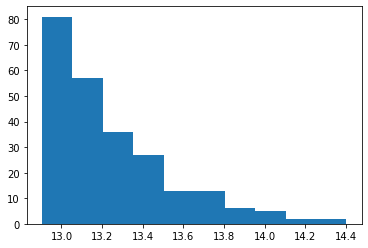

In [78]:
plt.hist(train[train['y']>40*10000]['log_y'])

(array([137.,  49.,  25.,  15.,   4.,   5.,   3.,   2.,   1.,   1.]),
 array([ 402000.,  541800.,  681600.,  821400.,  961200., 1101000.,
        1240800., 1380600., 1520400., 1660200., 1800000.]),
 <a list of 10 Patch objects>)

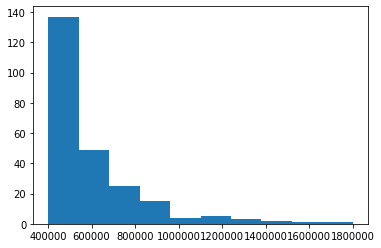

In [94]:
plt.hist(train[train['y']>40*10000]['y'])

(array([35., 28., 22., 41., 23., 21., 18., 22., 17., 15.]),
 array([0.49778495, 0.49778495, 0.49778495, 0.49778495, 0.49778495,
        0.49778495, 0.49778495, 0.49778495, 0.49778495, 0.49778495,
        0.49778495]),
 <a list of 10 Patch objects>)

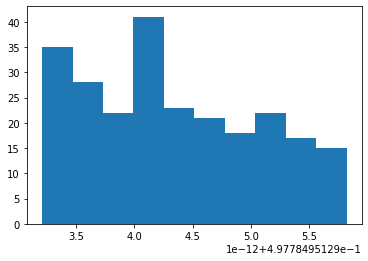

In [92]:
data, lmbda = stats.boxcox(train[train['y']>40*10000]['y'])
plt.hist(data)

In [95]:
tage = train[train['y']>40*10000]['y']

In [99]:
for i in range(4,19):
    hoge = 0
    for j in tage:
#         print(j)
        if i*100000<j and j<(i+1)*100000:
            hoge += 1
    print('{}-{}: {}'.format(i,i+1,hoge))

4-5: 110
5-6: 43
6-7: 18
7-8: 13
8-9: 7
9-10: 6
10-11: 0
11-12: 3
12-13: 1
13-14: 1
14-15: 1
15-16: 0
16-17: 1
17-18: 0
18-19: 0
